# Making a Workflow - Loading zarr to napari and processing it interactively
Here we will quickly show you how to open zarr files easily into napari and afterwards we will make an image analysis workflow in napari. First, we are loading the data, which is only a few lines of code thanks to dask and its implementation in napari:

In [1]:
import napari
import dask.array as da

# Make sure to select the file location on your machine!
zarr_file = r"C:\Users\ryans\Documents\output data (big)\dask tutorial\lund_zenodo.zarr"
rescaled_stack = da.from_zarr(url=zarr_file, component="rescaled_data")

viewer = napari.Viewer()
viewer.add_image(rescaled_stack, name = "Rescaled")

C:\Users\ryans\Anaconda3\envs\np_workflows_v1\envs\dask-testing\lib\site-packages\napari_tools_menu\__init__.py:179: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'Rescaled' at 0x1e3cb789430>

2022-07-11 11:34:21.928 | INFO     | napari_assistant._gui._category_widget:call_op:162 - gaussian_blur (clesperanto)(..., 1.0, 1.0, 0.0)
2022-07-11 11:34:30.274 | INFO     | napari_assistant._gui._category_widget:call_op:162 - gaussian_blur (clesperanto)(..., 1.0, 1.0, 0.0)
(Make sure 'QVector<int>' is registered using qRegisterMetaType().)
(Make sure 'QVector<int>' is registered using qRegisterMetaType().)
2022-07-11 11:34:38.845 | INFO     | napari_assistant._gui._category_widget:call_op:162 - gaussian_blur (clesperanto)(..., 1.0, 1.0, 0.0)
2022-07-11 11:34:43.229 | INFO     | napari_assistant._gui._category_widget:call_op:162 - gaussian_blur (clesperanto)(..., 1.0, 1.0, 0.0)
2022-07-11 11:35:16.712 | INFO     | napari_assistant._gui._category_widget:call_op:162 - gaussian_blur (clesperanto)(..., 1.0, 1.0, 0.0)
2022-07-11 11:35:22.204 | INFO     | napari_assistant._gui._category_widget:call_op:162 - gaussian_blur (clesperanto)(..., 1.0, 1.0, 0.0)


Once we are in napari we can use the [napari assistant](https://github.com/haesleinhuepf/napari-assistant) to interactively work on an image analysis workflow. We'll start with some noise removal using a gaussian filter:

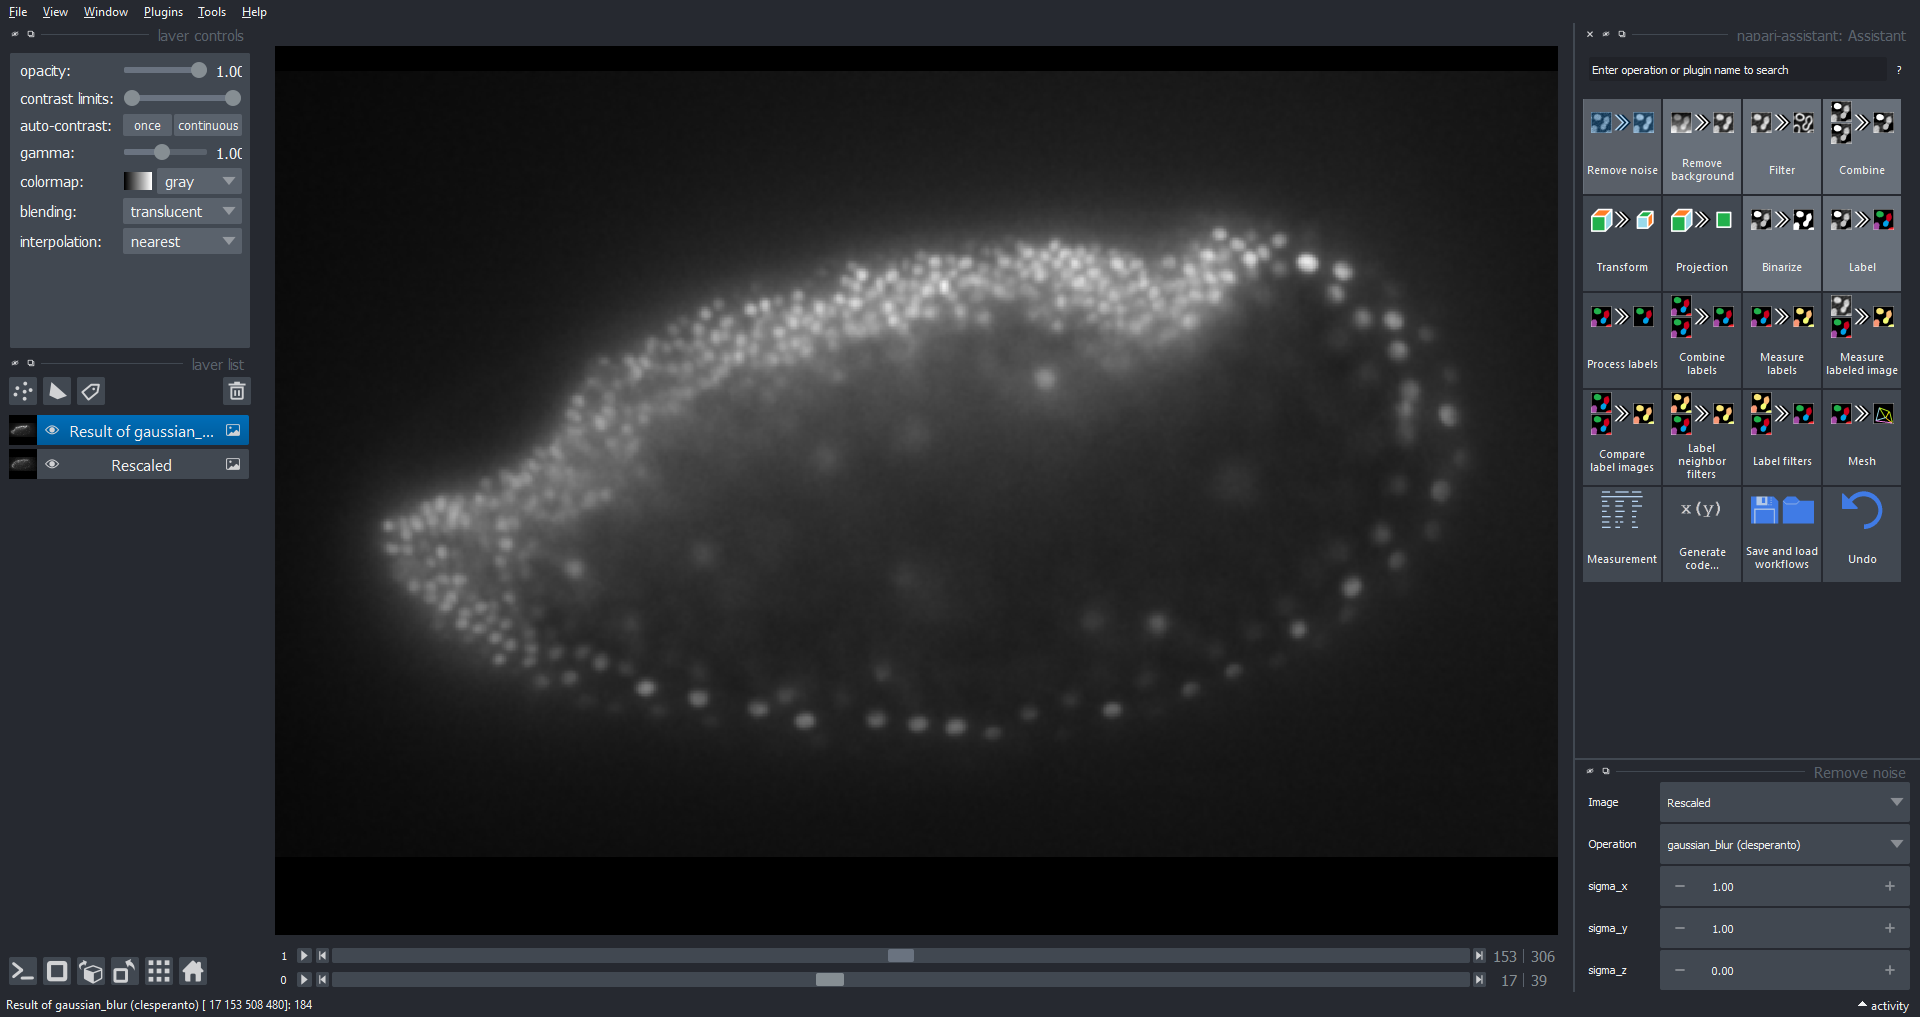

2022-07-11 11:35:44.415 | INFO     | napari_assistant._gui._category_widget:call_op:162 - top_hat_box (clesperanto)(..., 10.0, 10.0, 0.0)
2022-07-11 11:35:50.841 | INFO     | napari_assistant._gui._category_widget:call_op:162 - top_hat_box (clesperanto)(..., 5.0, 10.0, 0.0)
2022-07-11 11:35:59.606 | INFO     | napari_assistant._gui._category_widget:call_op:162 - top_hat_box (clesperanto)(..., 5.0, 5.0, 0.0)
2022-07-11 11:36:09.527 | INFO     | napari_assistant._gui._category_widget:call_op:162 - top_hat_sphere (clesperanto)(..., 5.0, 5.0, 0.0)
2022-07-11 11:36:28.357 | INFO     | napari_assistant._gui._category_widget:call_op:162 - top_hat_sphere (clesperanto)(..., 4.0, 5.0, 0.0)
2022-07-11 11:36:38.410 | INFO     | napari_assistant._gui._category_widget:call_op:162 - top_hat_sphere (clesperanto)(..., 4.0, 4.0, 0.0)
INFO:OpenGL.acceleratesupport:No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'


In [2]:
napari.utils.nbscreenshot(viewer)

After that we can apply background subtraction, making sure that most nuclei are kept and not deleted with the background:

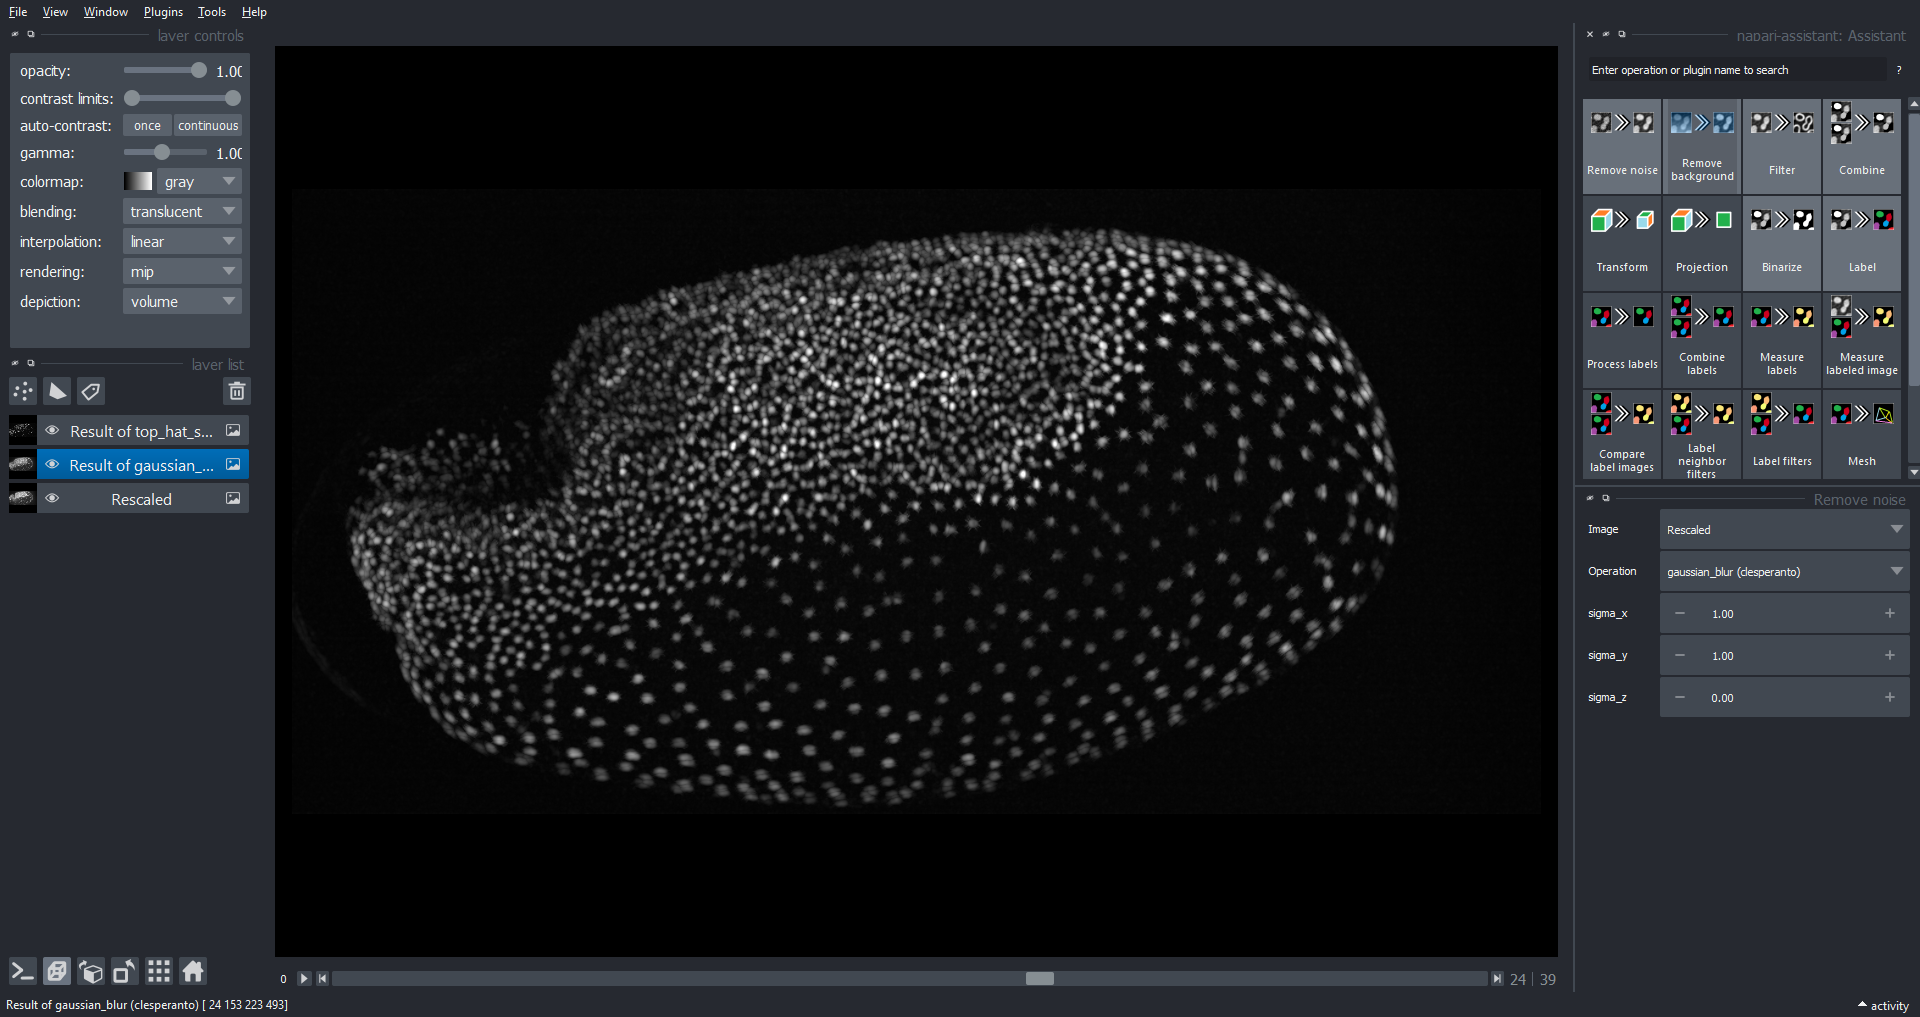

2022-07-11 11:39:31.681 | INFO     | napari_assistant._gui._category_widget:call_op:162 - voronoi_otsu_labeling (clesperanto)(..., 2.0, 2.0)
2022-07-11 11:39:58.549 | INFO     | napari_assistant._gui._category_widget:call_op:162 - voronoi_otsu_labeling (clesperanto)(..., 2.0, 2.0)


In [3]:
napari.utils.nbscreenshot(viewer)

Finally, we can label the nuclei using voronoi-otsu labelling leading to segmented nuclei:

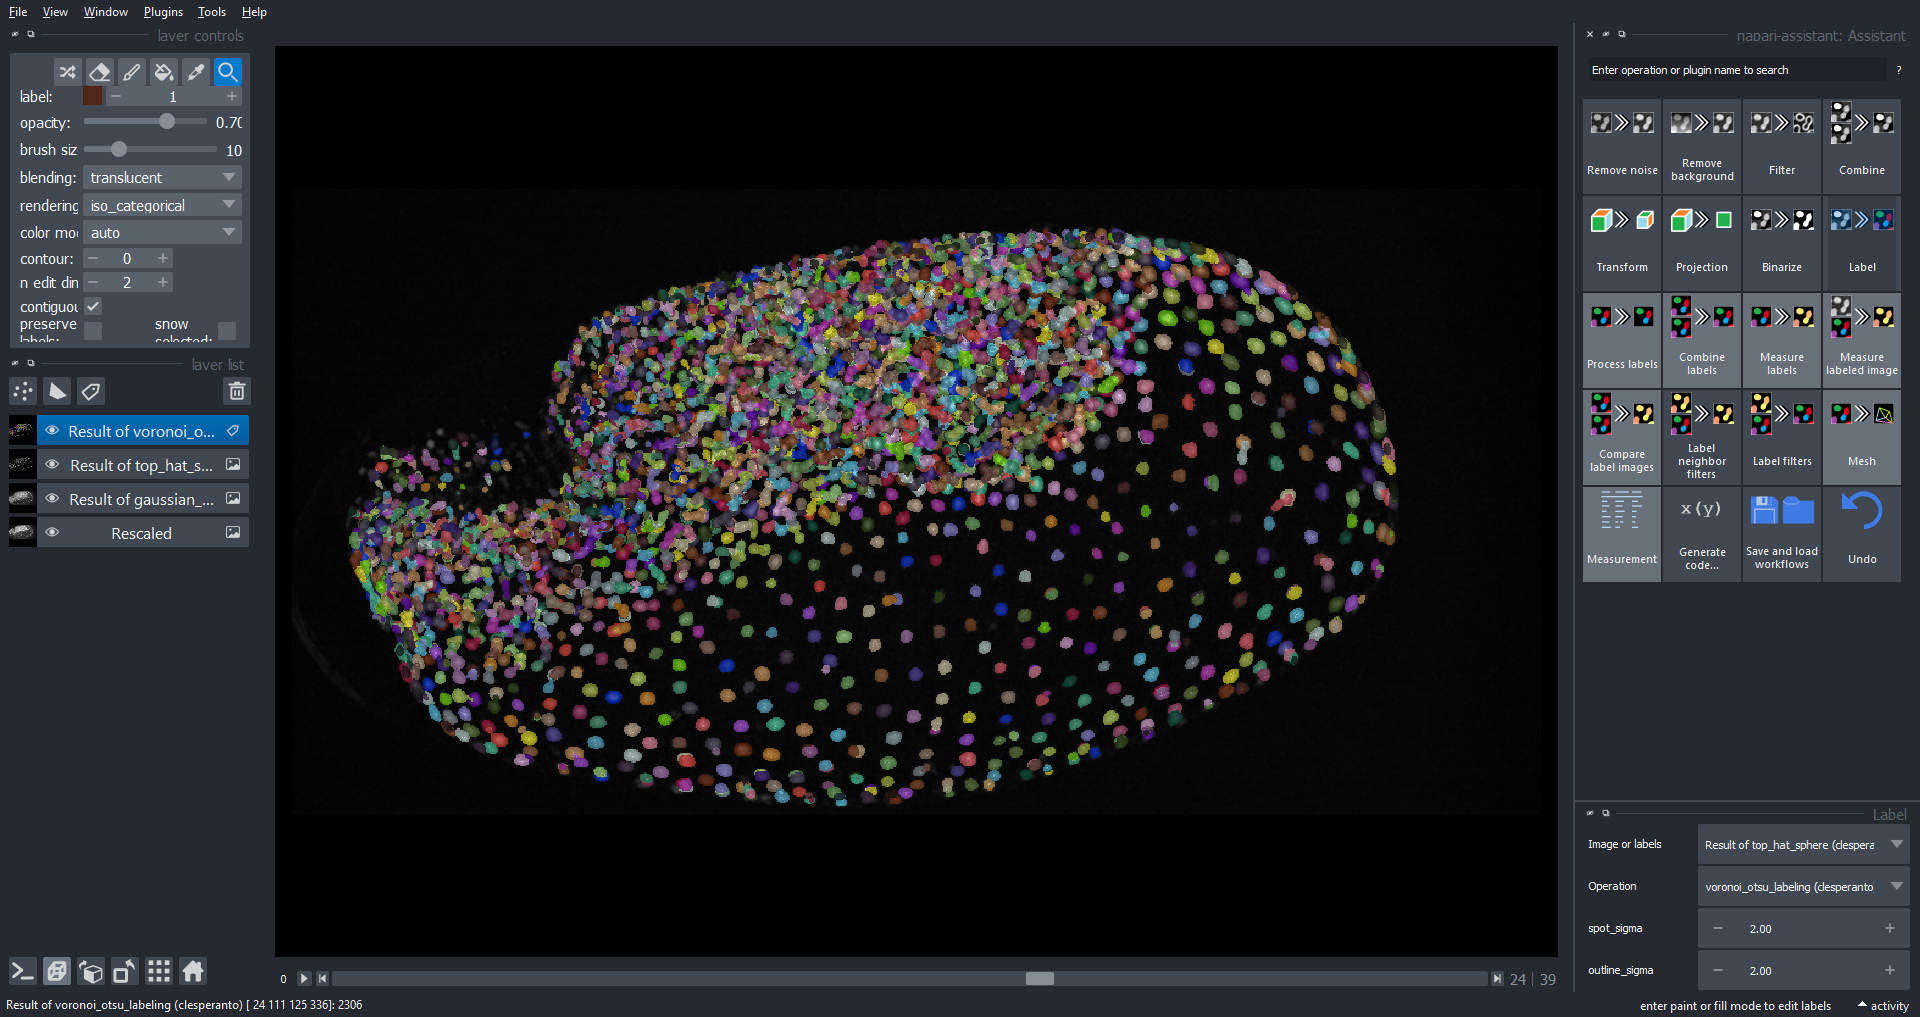

In [4]:
napari.utils.nbscreenshot(viewer)

When we are happy with the workflow we can export it as a .yaml file to our workspace for later use:
- To continue fine tuning at a later time point
- To apply it to all images using dask